In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os, sys
import pandas as pd
import sklearn
import sklearn.svm, sklearn.discriminant_analysis
import time

root = '/usr/local/serenceslab/maggie/shapeDim/'
sys.path.append(os.path.join(root, 'Analysis'))
from code_utils import file_utils, data_utils, plot_utils

In [3]:
from decoding import decode_binary
subjects = np.arange(1,8)
n_subj = len(subjects)
# decode_binary_withintask.decode(np.arange(1,8))

In [4]:
task_names = ['Linear (1)','Linear (2)','Checker', 'Repeat'];
n_tasks = len(task_names)
task_colors = np.flipud(cm.GnBu(np.linspace(0,1,5))[1:,:])

n_subjects = 7
subjects = np.arange(1,8)
subcolors = cm.Dark2(np.linspace(0,1,n_subjects))

bound_names = ['Decode: Linear (1)','Decode: Linear (2)','Decode: Checker'];


In [8]:
save_folder = os.path.join(root, 'Analysis', 'decoding_results')
# save_filename = os.path.join(save_folder, 'decode_binary_within_task.npy')
save_filename = os.path.join(save_folder, 'decode_binary_within_task.npy')
acc = np.load(save_filename)

roi_names = ['V1', 'V2', 'V3', 'V3AB', 'hV4', 'LO1', 'LO2', 'IPSall']
n_rois = 8


In [9]:
acc.shape

(7, 8, 4, 3)

In [10]:
[np.mean(acc[3,:,ti,:]) for ti in [0,1,2,3]]

[0.6666666666666666,
 0.6641710069444444,
 0.6672092013888888,
 0.6590711805555555]

<Figure size 432x288 with 0 Axes>

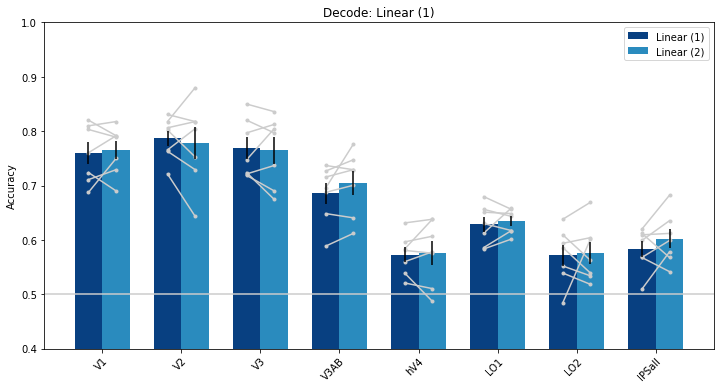

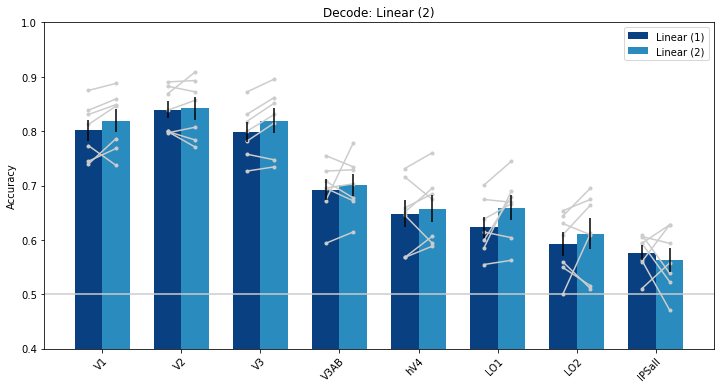

In [11]:
subs_plot = [0,1,2,3,4,5,6]
plt.figure()
bounds_plot = [0,1]
tasks_plot = [0,1]

for bi in bounds_plot:
    
    vals = acc[:,:,tasks_plot,bi]
    vals = vals[subs_plot,:]
    meanvals = np.mean(vals, axis=0)
    semvals = np.std(vals, axis=0)/np.sqrt(n_subj-1)
    
    plot_utils.plot_multi_bars(mean_data = meanvals, \
                               err_data = semvals, \
                               point_data = vals, \
                               add_ss_lines=True,
                               colors = task_colors, \
                               space = 0.15, \
                               title = bound_names[bi], \
                               ylim = [0.40, 1.0], \
                               horizontal_line_pos = 0.50,
                               xticklabels = roi_names, \
                               ylabel = 'Accuracy', \
                               legend_overlaid=True, \
                               legend_separate=False, \
                               legend_labels = np.array(task_names)[tasks_plot]);

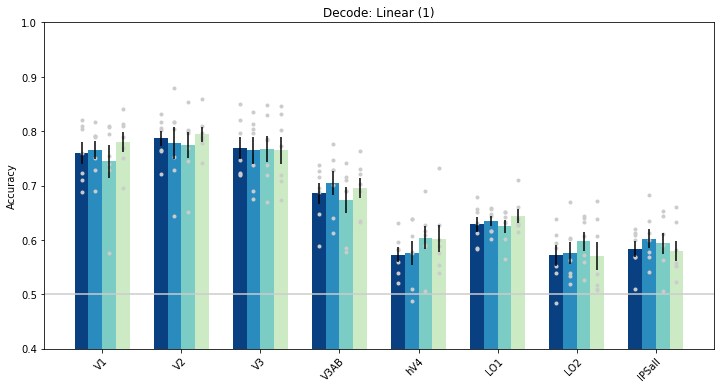

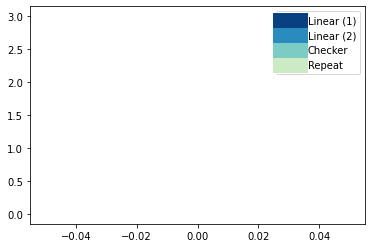

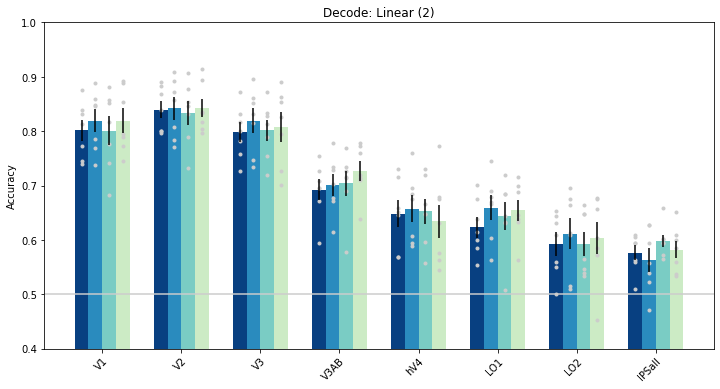

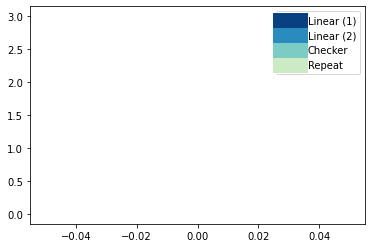

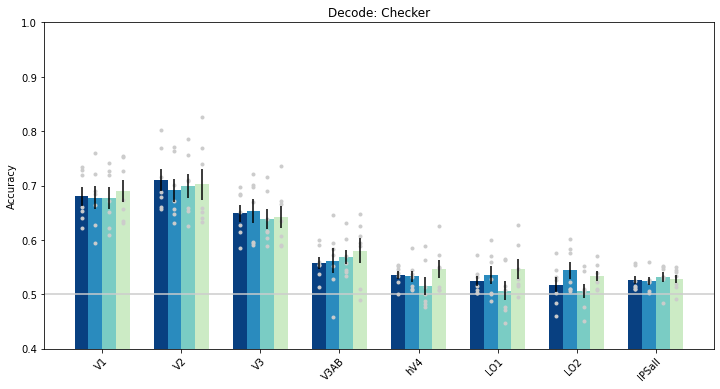

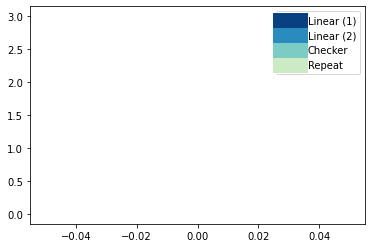

In [12]:
# plt.figure()

n_bounds = len(bound_names)

for bi in range(n_bounds):
    
    vals = acc[:,:,:,bi]
    meanvals = np.mean(vals, axis=0)
    semvals = np.std(vals, axis=0)/np.sqrt(n_subj-1)
    
    plot_utils.plot_multi_bars(mean_data = meanvals, \
                               err_data = semvals, \
                               point_data = vals, \
                               colors = task_colors, \
                               space = 0.15, \
                               title = bound_names[bi], \
                               ylim = [0.40, 1.0], \
                               horizontal_line_pos = 0.50, \
                               xticklabels = roi_names, \
                               ylabel = 'Accuracy', \
                               legend_labels = task_names);